# Desnutrición Aguda en Menores de 5 Años - Análisis preliminar de los datos




Registro de pacientes atendidos en las Instituciones Prestadoras de Servicios de Salud con diagnóstico confirmado de Desnutrición Aguda en menores de 5 años y notificados al SIVIGILA desde el año 2016 al 2021.

In [38]:
# Importar librerías
import pandas as pd
import seaborn as sns
import requests
import json
import matplotlib.pyplot as plt

In [39]:
# URL directa del archivo JSON
url = 'https://raw.githubusercontent.com/daalpugu/Grupo-21---Proyecto-ANS/main/data/sivigila_Desnutricion.json'

# Hacer una solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Cargar el contenido en un objeto JSON
var_des = json.loads(response.text)

# Abrir el archivo de descripción de variables en modo lectura (r) *Para la opción de repositorio local
#with open('https://raw.githubusercontent.com/daalpugu/Grupo-21---Proyecto-ANS/main/data/sivigila_Desnutricion.json', 'r') as file:
#    var_des = json.load(file)

# Convertir el diccionario en DF
df_var_des =  pd.DataFrame(var_des['fields'])

# Permitir que se muestre todo el contenido de la variable
pd.set_option('display.max_colwidth', None)

# Resetear la opción de mostrar todo el contenido de las variables
# pd.reset_option('display.max_colwidth')

df_var_des[['name','description']]

,name,description
0,ID,Número consecutivo
1,semana,semanas del año de 1 a 53
2,edad,Edad
3,uni_med_,"Unidad de medida:\n0= No aplica, 1=Años, 2=Meses, 3=Días, 4=Horas, 5=Minutos SD=Sin informacion"
4,sexo_,"M=Masculino, F=Femenino, SD=Sin informacion"
5,nombre_barrio,"Texto asociado a la tabla de barrios definidos por la entidad territorial, Vacios se diligencian con ""Sin iNformacion"", Sin ubicación en zona urbana."
6,comuna,"Texto asociado a la tabla de barrios definidos por la entidad territorial, Vacios se diligencian con ""Sin iNformacion"", Sin ubicación en zona urbana."
7,tipo_ss_,"Tipo de Régimen de seguridad social:\nC= Contributivo, S=Subsidiado, P=Excepción, E=Especial,\nN= No asegurado, I= Indeterminado/Pendiente, SD=Sin informacion."
8,cod_ase_,Codigo de la aseguradora
9,fec_con_,Fecha de Consulta


In [35]:
# Cargar la base de datos desde el repositorio en Github
url = 'https://raw.githubusercontent.com/daalpugu/Grupo-21---Proyecto-ANS/main/data/sivigila_desnutricion.csv'
df = pd.read_csv(url)

In [36]:
print(f"El tamaño de la base es: {df.shape}")
df.head()

El tamaño de la base es: (2802, 26)


,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,...,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_
0,1,19,1,1,M,Picacho,Doce de Octubre,S,CCF002,30/03/2016,...,6,0,1,1,2,8.5,79,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
1,2,19,3,1,M,Picachito,Doce de Octubre,S,CCF002,31/03/2016,...,6,1,1,1,2,11,90,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
2,3,27,2,1,M,Santo Domingo Savio No.2,Popular,S,CCF002,22/06/2016,...,13,6,1,1,1,8.6,81.6,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
3,4,27,1,1,M,LLanaditas,Villa Hermosa,C,EPS010,05/07/2016,...,6,6,1,1,2,7.5,72,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016
4,5,37,9,2,M,El Nogal-Los Almendros,Belen,C,EPSS16,04/08/2016,...,5,5,1,1,1,7,70,13,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016


In [8]:
df.tail()

,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,...,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_
2797,2798,36,22,3,F,Sin informacion,Sin informacion,C,EPS037,7/09/2021,...,19,0,2,1,1,3,52,"8,5",DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2798,2799,37,2,2,F,Sin informacion,Sin informacion,S,ESS024,14/09/2021,...,0,0,1,1,2,"2,7",53,6,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2799,2800,39,2,1,F,Sin informacion,Sin informacion,C,ESSC24,29/09/2021,...,0,0,1,1,2,"4,6",65,6,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2800,2801,43,2,1,F,Sin informacion,Sin informacion,I,"\""\""",27/10/2021,...,18,6,2,1,1,"8,6",81,"12,5",DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2801,2802,41,3,2,M,Sin informacion,Sin informacion,S,EPSS40,13/10/2021,...,0,1,2,2,2,"3,9",58,0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021


In [9]:
# Ajustar las variables decimales, porque hay números con . y otros con ,
df['talla_nac'] = df['talla_nac'].str.replace(',','.')
df['peso_act'] = df['peso_act'].str.replace(',','.')
df['talla_act'] = df['talla_act'].str.replace(',','.')
df['per_braqu'] = df['per_braqu'].str.replace(',','.')

df['talla_nac'] = df['talla_nac'].astype(float)
df['peso_act'] = df['peso_act'].astype(float)
df['talla_act'] = df['talla_act'].astype(float)
df['per_braqu'] = df['per_braqu'].astype(float)

df.tail()


,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,...,t_lechem,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_
2797,2798,36,22,3,F,Sin informacion,Sin informacion,C,EPS037,7/09/2021,...,19,0,2,1,1,3.0,52.0,8.5,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2798,2799,37,2,2,F,Sin informacion,Sin informacion,S,ESS024,14/09/2021,...,0,0,1,1,2,2.7,53.0,6.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2799,2800,39,2,1,F,Sin informacion,Sin informacion,C,ESSC24,29/09/2021,...,0,0,1,1,2,4.6,65.0,6.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2800,2801,43,2,1,F,Sin informacion,Sin informacion,I,"\""\""",27/10/2021,...,18,6,2,1,1,8.6,81.0,12.5,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021
2801,2802,41,3,2,M,Sin informacion,Sin informacion,S,EPSS40,13/10/2021,...,0,1,2,2,2,3.9,58.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2021


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2802 non-null   int64  
 1   semana         2802 non-null   int64  
 2   edad_          2802 non-null   int64  
 3   uni_med_       2802 non-null   int64  
 4   sexo_          2802 non-null   object 
 5   nombre_barrio  2802 non-null   object 
 6   comuna         2802 non-null   object 
 7   tipo_ss_       2802 non-null   object 
 8   cod_ase_       2802 non-null   object 
 9   fec_con_       2802 non-null   object 
 10  ini_sin_       2802 non-null   object 
 11  tip_cas_       2802 non-null   int64  
 12  pac_hos_       2802 non-null   int64  
 13  peso_nac       2802 non-null   int64  
 14  talla_nac      2802 non-null   float64
 15  edad_ges       2802 non-null   int64  
 16  t_lechem       2802 non-null   int64  
 17  e_complem      2802 non-null   int64  
 18  crec_dll

In [11]:
'''Teniendo en cuenta que la variable edad puede estar en días, meses o años,
se crea una nueva variable de edad estandarizada en meses para mejor interpretabilidad'''

# Crear una función para calcular la edad en meses
def edad_meses(fila):
  if fila['uni_med_'] == 1:
    return fila['edad_']*12 # si la edad está en años multiplicar x12 meses
  elif fila['uni_med_'] == 2:
    return fila['edad_']    # si la edad está en meses dejar el mismo valor
  elif fila['uni_med_'] == 3:
    return (round(fila['edad_']/30, 2)) # si la edad está en días, dividir en 30 días y redondear a 2 decimales
  else:
    return None # si no se cumple ninguno de los casos anteriores

# Crear la variable edad_mes
df['edad_mes'] = df.apply(edad_meses, axis=1) # aplicar la función anterior a las filas
df.head()

,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,...,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_,edad_mes
0,1,19,1,1,M,Picacho,Doce de Octubre,S,CCF002,30/03/2016,...,0,1,1,2,8.5,79.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,12.0
1,2,19,3,1,M,Picachito,Doce de Octubre,S,CCF002,31/03/2016,...,1,1,1,2,11.0,90.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,36.0
2,3,27,2,1,M,Santo Domingo Savio No.2,Popular,S,CCF002,22/06/2016,...,6,1,1,1,8.6,81.6,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,24.0
3,4,27,1,1,M,LLanaditas,Villa Hermosa,C,EPS010,05/07/2016,...,6,1,1,2,7.5,72.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,12.0
4,5,37,9,2,M,El Nogal-Los Almendros,Belen,C,EPSS16,04/08/2016,...,5,1,1,1,7.0,70.0,13.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,9.0


In [12]:
df['edad_mes'].dtype

dtype('float64')

In [13]:
# Nuevo df sin variables edad_, uni_med_

df_1 = df.drop(columns=['edad_', 'uni_med_'])
df_1.head()

,id,semana,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,ini_sin_,tip_cas_,...,e_complem,crec_dllo,esq_vac,carne_vac,peso_act,talla_act,per_braqu,evento,year_,edad_mes
0,1,19,M,Picacho,Doce de Octubre,S,CCF002,30/03/2016,30/03/2016,4,...,0,1,1,2,8.5,79.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,12.0
1,2,19,M,Picachito,Doce de Octubre,S,CCF002,31/03/2016,31/03/2016,4,...,1,1,1,2,11.0,90.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,36.0
2,3,27,M,Santo Domingo Savio No.2,Popular,S,CCF002,22/06/2016,01/01/1900,4,...,6,1,1,1,8.6,81.6,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,24.0
3,4,27,M,LLanaditas,Villa Hermosa,C,EPS010,05/07/2016,05/06/2016,4,...,6,1,1,2,7.5,72.0,0.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,12.0
4,5,37,M,El Nogal-Los Almendros,Belen,C,EPSS16,04/08/2016,04/08/2016,4,...,5,1,1,1,7.0,70.0,13.0,DESNUTRICION AGUDA EN MENORES DE 5 AÑOS,2016,9.0


In [40]:
# Estadísticas descriptivas variables numéricas
descriptivas = df_1.describe(include='all')
descriptivas.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2802.0,NaN,NaN,NaN,1401.5,809.012052,1.0,701.25,1401.5,2101.75,2802.0
semana,2802.0,NaN,NaN,NaN,26.838687,14.567048,1.0,14.0,27.0,39.0,53.0
sexo_,2802,2,M,1670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre_barrio,2802,365,SIN INFORMACION,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comuna,2802,28,Manrique,271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_ss_,2802,6,C,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_ase_,2802,55,EPS010,754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fec_con_,2802,1286,15/06/2018,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ini_sin_,2802,1212,01/01/1900,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tip_cas_,2802.0,NaN,NaN,NaN,4.0,0.0,4.0,4.0,4.0,4.0,4.0


<ipython-input-53-d3e3bcd7f48d>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_filas, n_cols, posicion + 1)


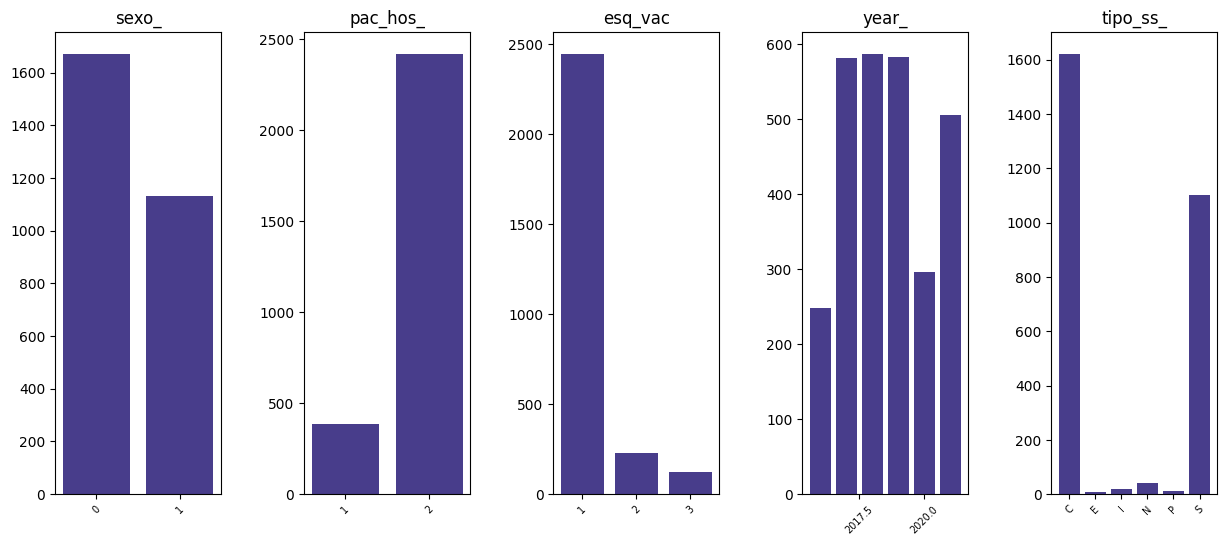

In [53]:
# Gráfico de barras de las variables: sexo, paciente hospitalizado, esquema de vacunación y año

cols_1 = ['sexo_', 'pac_hos_', 'esq_vac', 'year_', 'tipo_ss_']

n_cols = 5
n_filas = 1
fig,axes = plt.subplots(figsize=(15, 6))

for posicion,variable in enumerate(cols_1):
        aux_lista_valores = df_1[variable] #extrae los valores de la variable
        aux_llaves = aux_lista_valores.unique()
        aux_llaves.sort()
        conteo = []
        for j in aux_llaves:
            aux = aux_lista_valores.tolist().count(j)
            conteo.append(aux)

        plt.subplot(n_filas, n_cols, posicion + 1)
        plt.subplots_adjust(hspace=1.5, wspace= .5) #espacio entre filas
        plt.bar(aux_llaves,conteo, color="darkslateblue")
        plt.title(variable)
        plt.xticks(rotation=45,fontsize=7)
plt.show()

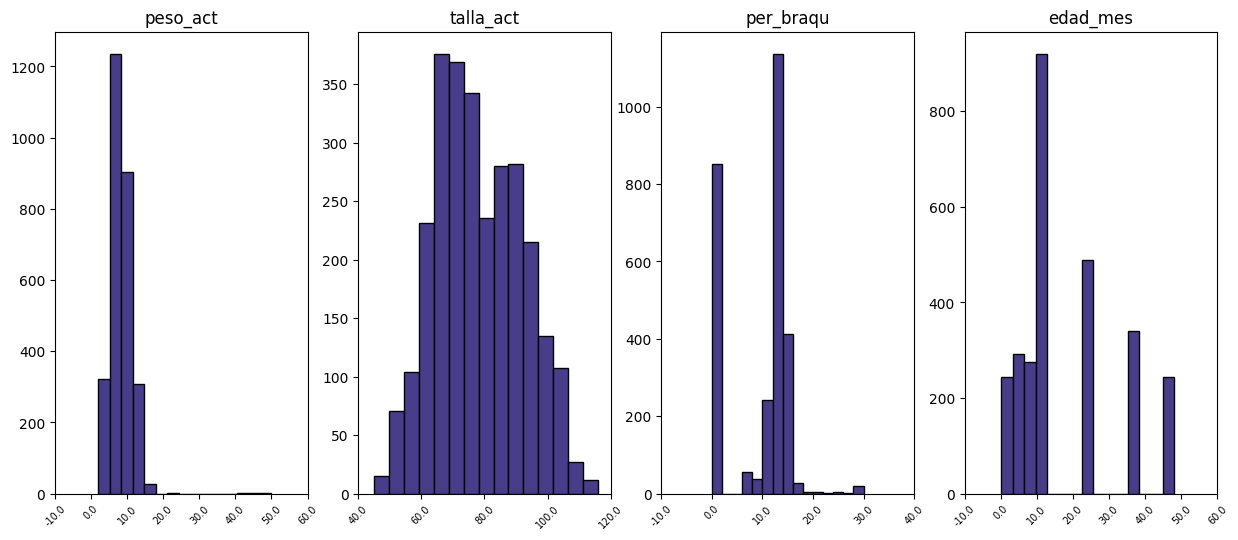

In [57]:
# Histogramas de las variables: 'peso_act', 'talla_act', 'per_braqu' y 'edad_mes'

cols_2 = ['peso_act', 'talla_act', 'per_braqu', 'edad_mes']

n_cols = 4
n_filas = 1
fig,axes = plt.subplots(n_filas, n_cols, figsize=(15, 6))

for posicion,variable in enumerate(cols_2):
        ax = axes[posicion]
        aux_lista_valores = df_1[variable] #extrae los valores de la variable
        plt.subplot(n_filas, n_cols, posicion + 1)
        plt.subplots_adjust(hspace=1.5) #espacio entre filas
        plt.hist(aux_lista_valores, edgecolor = "k", bins=15, color = 'darkslateblue')
        plt.title(variable)
        xticks = ax.get_xticks()
        interval = max(1, len(xticks) // 10)  # Evitar división por cero
        ax.set_xticks(xticks[::interval])
        ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=7)

plt.show()

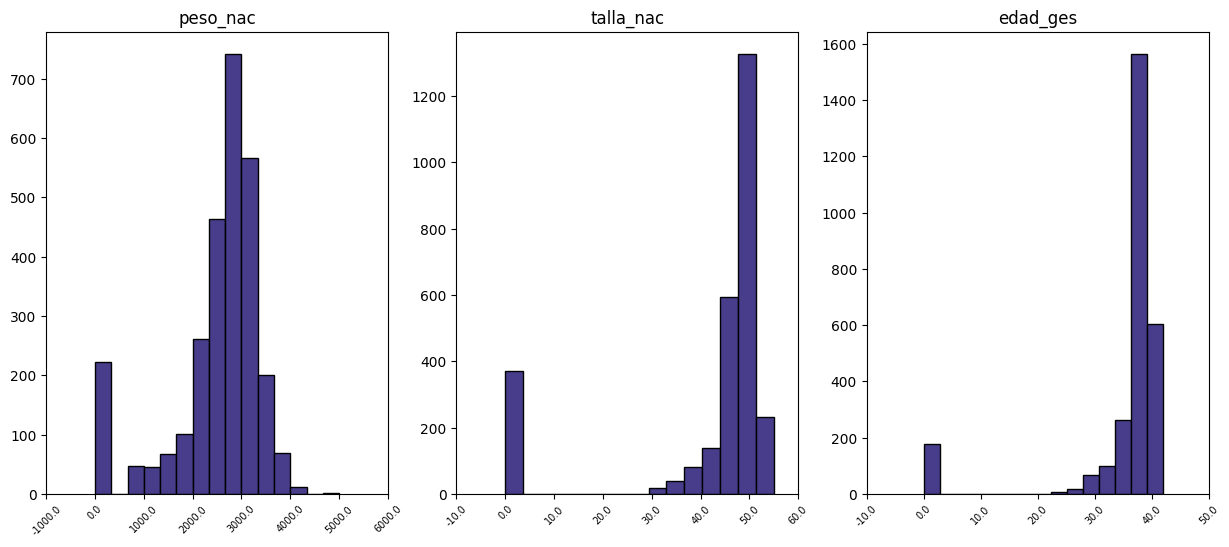

In [55]:
# Histogramas de las variables: 'peso_nac', 'talla_nac' y 'edad_ges'

cols_2 = ['peso_nac', 'talla_nac', 'edad_ges']

n_cols = 3
n_filas = 1
fig,axes = plt.subplots(n_filas, n_cols, figsize=(15, 6))

for posicion,variable in enumerate(cols_2):
        ax = axes[posicion]
        aux_lista_valores = df_1[variable] #extrae los valores de la variable
        plt.subplot(n_filas, n_cols, posicion + 1)
        plt.subplots_adjust(hspace=1.5) #espacio entre filas
        plt.hist(aux_lista_valores, edgecolor = "k", bins=15, color = 'darkslateblue')
        plt.title(variable)
        xticks = ax.get_xticks()
        interval = max(1, len(xticks) // 10)  # Evitar división por cero
        ax.set_xticks(xticks[::interval])
        ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=7)


In [30]:
num_ceros = (df['per_braqu'] == 0).sum()
print(f"Número de valores igual a 0 variable 'per_braqui': {num_ceros}")
num_ceros = (df['peso_nac'] == 0).sum()
print(f"Número de valores igual a 0 variable 'peso_nac': {num_ceros}")
num_ceros = (df['peso_nac'] == 5000).sum()
print(f"Número de valores igual a 5000 variable 'peso_nac': {num_ceros}")
num_ceros = (df['talla_nac'] == 0).sum()
print(f"Número de valores igual a 0 variable 'talla_nac': {num_ceros}")
num_ceros = (df['edad_ges'] == 0).sum()
print(f"Número de valores igual a 0 variable 'edad_ges': {num_ceros}")
num_ceros = ((df['peso_nac'] == 0) & (df['talla_nac'] == 0) & (df['edad_ges'] == 0)).sum()
print(f"Número de registros con 0 en las variables 'edad_ges', 'peso_nac' y 'talla_nac': {num_ceros}")


Número de valores igual a 0 variable 'per_braqui': 853
Número de valores igual a 0 variable 'peso_nac': 223
Número de valores igual a 5000 variable 'peso_nac': 1
Número de valores igual a 0 variable 'talla_nac': 371
Número de valores igual a 0 variable 'edad_ges': 177
Número de registros con 0 en las variables 'edad_ges', 'peso_nac' y 'talla_nac': 115


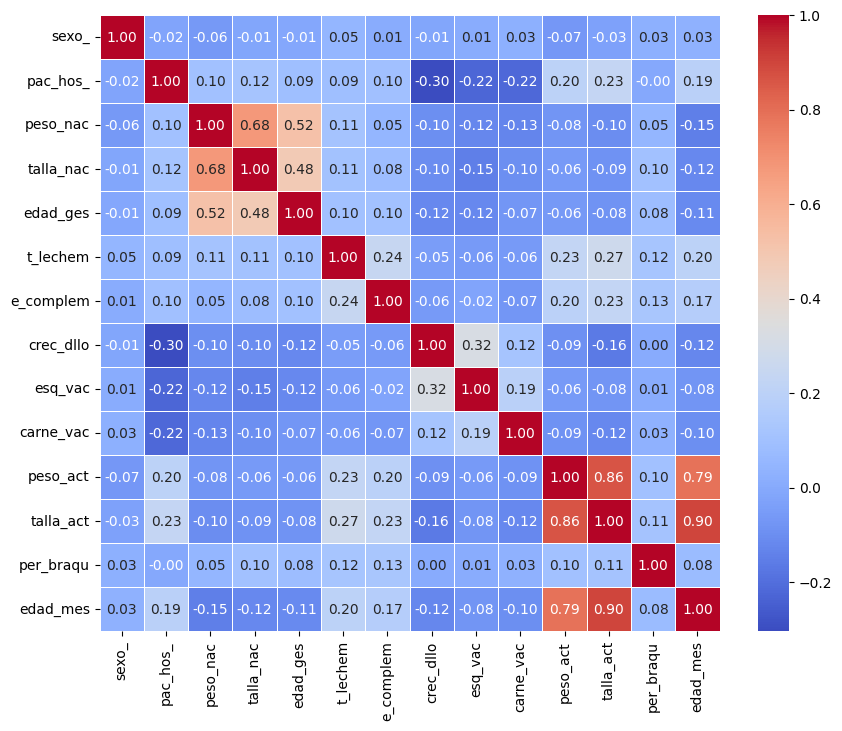

In [49]:
# Análisis de correlaciones entre variables numéricas:

# Se pasa la variable categórica 'sexo_' a una variable númerica para analizar su correlación con otras
df_1['sexo_'] = df_1['sexo_'].map({'M': 0, 'F': 1})
# Filtrar solo las columnas numéricas
df_numericas = df_1.select_dtypes(include=['float64', 'int64'])
df_numericas = df_numericas.drop(columns=['id', 'semana', 'year_', 'tip_cas_'])

# Calcular la matriz de correlación
matriz_correlacion = df_numericas.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el mapa de calor con valores numéricos
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.show()